In [21]:
import numpy as np
import pandas as pd  
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.datasets import load_boston
#df_boston = load_boston()
df_boston = pd.read_csv(load_boston()['filename'], skiprows=1)
#df_boston

In [3]:
#инфо про датасет
#print(load_boston()['DESCR'])

 CRIM - уровень преступности на душу населения
 ZN - доля жилой земли
 INDUS  - доля неторговой площади на город
 CHAS -?
 NOX - концентрация окиси озота
 RM - среднее кол-во комнат в доме
AGE - домовладельцы, доля
DIS - расстояние до 5 центров зантости
RAD - индекс доступности к магистралям
TAX - ставка налога на имущество
PTRATIO  - соотноение ученик-учитель
B - доля чернокожего населения
LSTAT - более низвий статус населения
MEDV - средняя стоимость домов

In [2]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [48]:
df_boston.describe().iloc[1:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


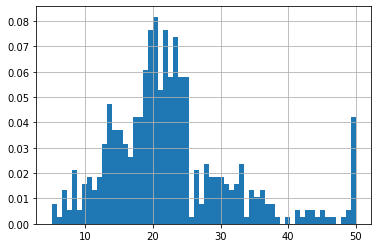

In [110]:
x = df_boston.MEDV
plt.hist(x, normed=True, bins=60)
plt.grid()

судя по гистограмме, существуют выбросы и значения MEDV ограничены 50

удалим все значения 50 в столбце MEDV

In [124]:
df_boston = df_boston.loc[df_boston['MEDV'] != 50]

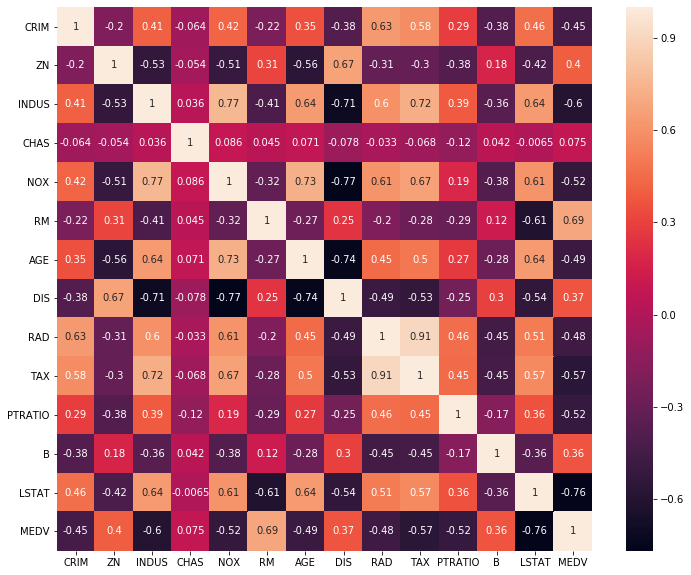

In [125]:
fig, ax = plt.subplots(figsize=(12,10)) 
hm = sns.heatmap(df_boston.corr(),annot=True)

Для обучения линейной модели выберем те признаки, которые имеют наибольшую корреляцию с целевым параметром MEDV. Из матрицы корреляций видно что это LSTAT, который имеет отрицательную корреляцию(-0.74) с MEDV и RM, который имеет положительную корреляцию(0.7) с MEDV

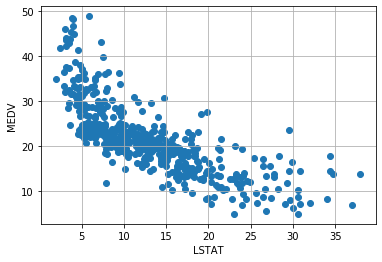

In [126]:
plt.scatter(df_boston.LSTAT, df_boston.MEDV)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.grid()
plt.show()

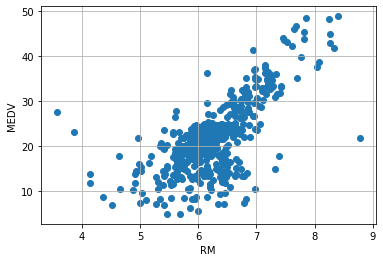

In [127]:
plt.scatter(df_boston.RM, df_boston.MEDV)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid()
plt.show()

Определим зависимые и независимые переменные

In [128]:
X = pd.DataFrame(np.c_[df_boston['LSTAT'], df_boston['RM']],columns = ['LSTAT','RM'])
#X = pd.DataFrame(np.c_[df_boston['LSTAT'], df_boston['RM'],df_boston['CRIM'],df_boston['TAX']],columns = ['LSTAT','RM', 'CRIM','TAX'])
#X = pd.DataFrame(df_boston['LSTAT'])
y = df_boston['MEDV']
print(X)
print(y)

     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
5     5.21  6.430
6    12.43  6.012
7    19.15  6.172
8    29.93  5.631
9    17.10  6.004
10   20.45  6.377
11   13.27  6.009
12   15.71  5.889
13    8.26  5.949
14   10.26  6.096
15    8.47  5.834
16    6.58  5.935
17   14.67  5.990
18   11.69  5.456
19   11.28  5.727
20   21.02  5.570
21   13.83  5.965
22   18.72  6.142
23   19.88  5.813
24   16.30  5.924
25   16.51  5.599
26   14.81  5.813
27   17.28  6.047
28   12.80  6.495
29   11.98  6.674
..     ...    ...
460  18.68  6.484
461  24.91  5.304
462  18.03  6.185
463  13.11  6.229
464  10.74  6.242
465   7.74  6.750
466   7.01  7.061
467  10.42  5.762
468  13.34  5.871
469  10.58  6.312
470  14.98  6.114
471  11.45  5.905
472  18.06  5.454
473  23.97  5.414
474  29.68  5.093
475  18.07  5.983
476  13.35  5.983
477  12.01  5.707
478  13.59  5.926
479  17.60  5.670
480  21.14  5.390
481  14.10  5.794
482  12.92  6.019
483  15.10

Для обучения модели разделим датасет на тренировочниый и тестовый в соотношении 70% и 30%

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(392, 2)
(98, 2)
(392,)
(98,)


In [130]:
#обучаем модель
estimator = LinearRegression()
estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)

оценим полученный результат, посчитав коэф. детерминации и среднеквардратичную и абсолютную ошибки. 

In [131]:
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.7448045405312271
RMSE: 	 4.393191407633263
MAE: 	 3.201822940823966


In [132]:
estimator.coef_

array([-0.58378702,  4.13782666])

In [133]:
X.columns

Index(['LSTAT', 'RM'], dtype='object')

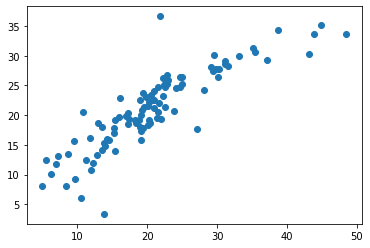

In [134]:
plt.scatter(y_test, y_pred)
plt.show()